## Initiation à la Regression Linéaire


In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt

In [138]:
df = pd.read_csv('ressources/datasets/income.csv')
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


### Statistiques descriptives

In [139]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


- Le dataset ne comporte pas de valeurs manquantes, et toutes les données sont de types integer

### Distribution des valeurs pour chaque colonne

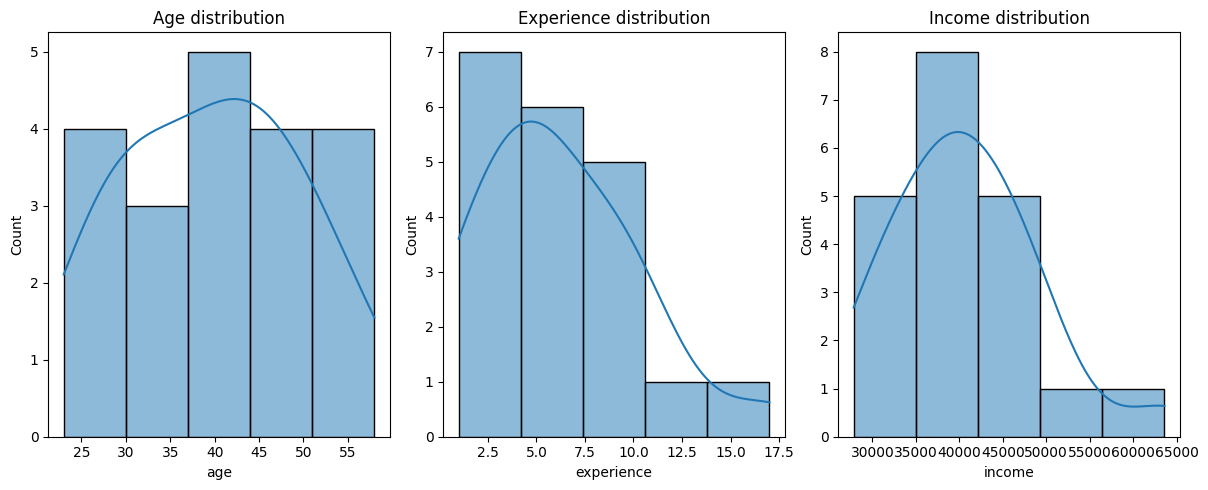

In [141]:
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, bins=5)
plt.title('Age distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['experience'], kde=True, bins=5)
plt.title('Experience distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['income'], kde=True, bins=5)
plt.title('Income distribution')

plt.tight_layout()
plt.show()

- on remarque une certaine similarité dans la tendance de distribution des données, en observant la courbe de distribution pour chacune
- il semblerait qu'il y ait une influence notable entre l'expérience et les salaires

### Visualisation si représentation linéaire entre les variables

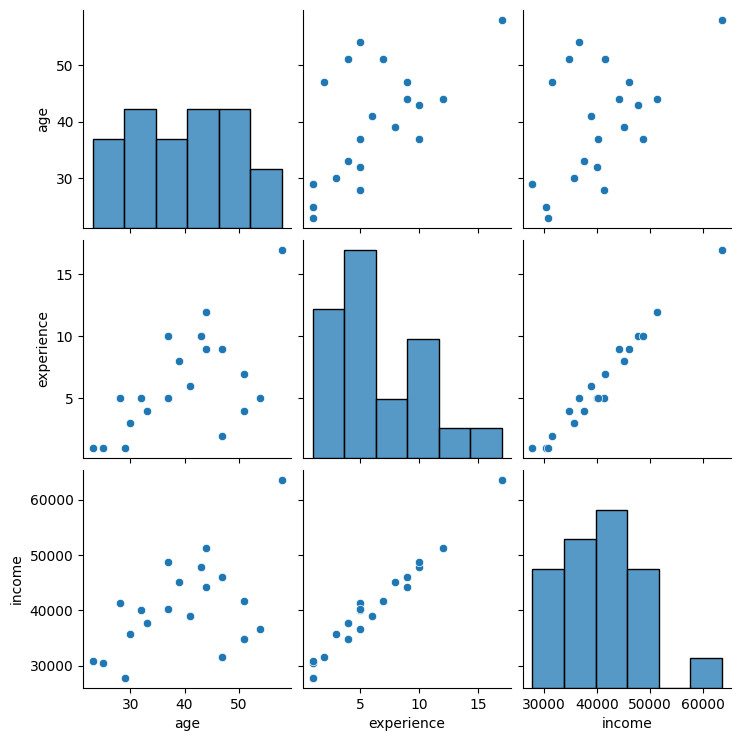

In [142]:
sns.pairplot(df)

- on remarque une influence linéaire entre les variables d'expériences et de salaire, et une linéarité bien moindre entre l'age et le salaire
- nos variables de prédictions ont donc une forte influence sur les salaires
- un model de régression linéaire semble être adapté

### Corrélation entre les variables

<Axes: >

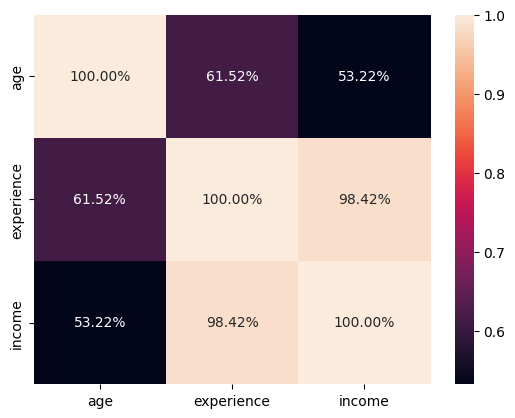

In [143]:
income_correlation = df.corr()
sns.heatmap(income_correlation, annot=True, fmt=".2%")

* on constate une corrélation forte entre l'expérience et le salaire:
    - la corrélation est de 98%
    - l'expérience a une forte influence sur les salaires
* la corrélation entre l'age et le salaire est très moyenne:
    - corrélation de 53%
    - l'influence de l'age existe mais reste modérée

L'experience est donc un prédicateur très significatif des salaires


### Model de Régression Linéaire

In [144]:
X = df[['age', 'experience']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lreg = LinearRegression()

lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

print(f"Taille données d'entrainement : {x_train.shape}; Taille données de validation : {x_test.shape}")

Taille données d'entrainement : (16, 2); Taille données de validation : (4, 2)


In [145]:
mse = mean_squared_error(y_test, y_pred)
mrse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erreur moyenne : {round(mse, 4)}")
print(f"Erreur moyenne racine : {round(mrse, 4)}")
print(f"Coeff de détermination : {round(r2, 2) * 100}%")

Erreur moyenne : 753796.7694
Erreur moyenne racine : 868.2147
Coeff de détermination : 94.0%


- avec un coefficient de détermination de 95% sur les données de validation, notre model semble avoir une bonne capacité de généralisation de prédiction des salaires en fonction de l'age et de l'experience des individus
- la racine de l'erreur moyenne est de 924.42, ce qui est correcte

La valeur élevé du coefficient de validation pourrait supposé de l'overfitting sur de nouvelles données. 
Dans le cas de cette valeur de coeff pour sur nos données de test, il ne semble pas y avoir de surapprentissage du model.

## Model de Régression Linéaire entre l'expérience et le salaire

In [146]:
X_exp = df[['experience']]

x_train_exp, x_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y, test_size=0.2, random_state=42)

lreg_exp = LinearRegression()

lreg_exp.fit(x_train_exp, y_train_exp)

y_pred_exp = lreg_exp.predict(x_test_exp)

In [147]:
r2_exp = r2_score(y_test_exp, y_pred_exp)
mse_exp = mean_squared_error(y_test_exp, y_pred_exp)
rmse_exp = sqrt(mse_exp)

print(f"Erreur moyenne : {round(mse_exp, 4)}")
print(f"Erreur moyenne racine : {round(rmse_exp, 4)}")
print(f"Coeff de détermination : {round(r2_exp, 2) * 100}%")

Erreur moyenne : 1313722.2999
Erreur moyenne racine : 1146.1773
Coeff de détermination : 89.0%


- bien que l'experience a une influence plus significative sur les salaires que l'age, le fait d'exclure l'age des variables de prédictions ne rend pas notre nouveau model plus performant
- le nouveau model prédisant les salaires en fonction uniquement de l'expérience a une bonne moyenne d'erreur plus élevé et un coefficient de détermination plus faible

In [151]:
df_predictions = pd.DataFrame({
    'age': [47, 50, 28, 19],
    'experience': [12, 20, 7, 2]
})

y_pred_new = lreg.predict(df_predictions)

In [155]:
y_pred_new

array([52572.93835726, 69508.20459895, 43719.0363299 , 33854.54196754])

### Visualisation des salaires prédits

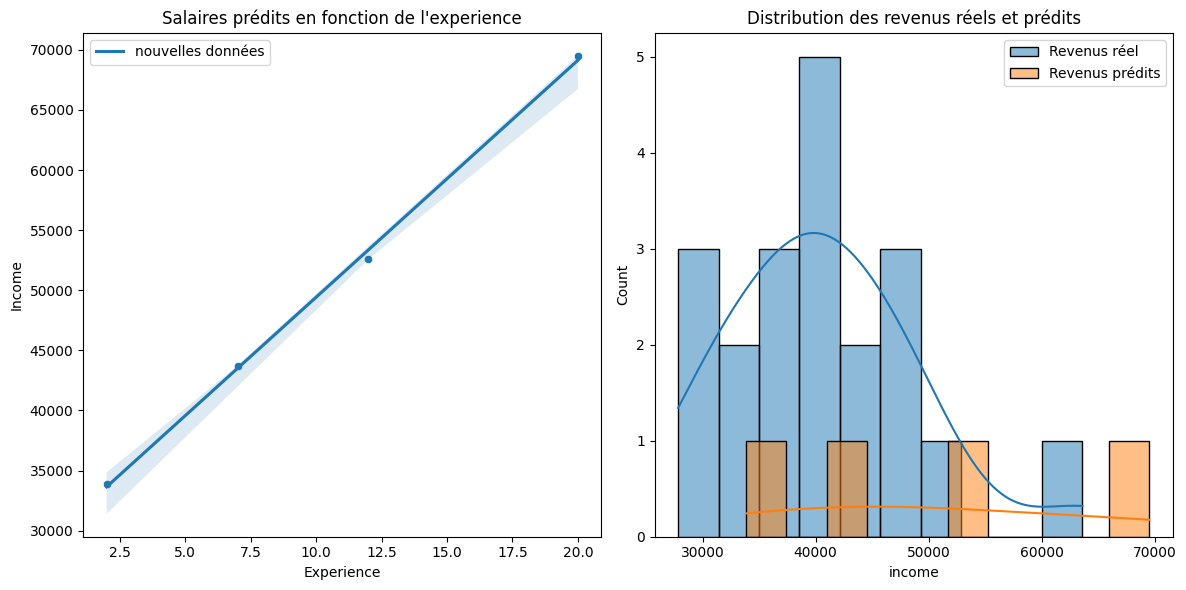

In [185]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1 )
sns.scatterplot(x=df_predictions['experience'], y=y_pred_new)
sns.regplot(x=df_predictions['experience'], y=y_pred_new, scatter=False, label='nouvelles données')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.title('Salaires prédits en fonction de l\'experience')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(y, kde=True, bins=10, label='Revenus réel')
sns.histplot(y_pred_new, kde=True, bins=10, label='Revenus prédits')
plt.title('Distribution des revenus réels et prédits')
plt.legend()

plt.tight_layout()
plt.show()